In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext tensorboard

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Transfer Learning
Using Past experience of a model and by just changing the last layers or by adding few layers, a new model is trained.

Example - Model A is trained on MNIST dataset to identify digits and Model B is to detect whether the digits are even or odd.

What can be done is considering the layers of Model A and excluding its output layer we would freeze them.

Then by adding a new ouput layer of our requirement, we can make a new model which performs better work than the previous one by using others capability.



![image](https://pennylane.ai/qml/_images/transfer_learning_general.png)

#### Model A to just recognize digits

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

LAYERS = [ tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")]


model_A = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model_A.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/10
1719/1719 - 4s - loss: 1.5275 - accuracy: 0.5970 - val_loss: 0.9444 - val_accuracy: 0.7980
Epoch 2/10
1719/1719 - 3s - loss: 0.7465 - accuracy: 0.8287 - val_loss: 0.5868 - val_accuracy: 0.8596
Epoch 3/10
1719/1719 - 3s - loss: 0.5412 - accuracy: 0.8624 - val_loss: 0.4685 - val_accuracy: 0.8834
Epoch 4/10
1719/1719 - 3s - loss: 0.4591 - accuracy: 0.8771 - val_loss: 0.4104 - val_accuracy: 0.8940
Epoch 5/10
1719/1719 - 3s - loss: 0.4142 - accuracy: 0.8869 - val_loss: 0.3758 - val_accuracy: 0.9006
Epoch 6/10
1719/1719 - 3s - loss: 0.3851 - accuracy: 0.8938 - val_loss: 0.3525 - val_accuracy: 0.9052
Epoch 7/10
1719/1719 - 3s - loss: 0.3644 - accuracy: 0.8979 - val_loss: 0.3348 - val_accuracy: 0.9102
Epoch 8/10
1719/1719 - 3s - loss: 0.3485 - accuracy: 0.9022 - val_loss: 0.3209 - val_accuracy: 0.9138
Epoch 9/10
1719/1719 - 3s - loss: 0.3356 - accuracy: 0.9053 - val_loss: 0.3111 - val_accuracy: 0.9152
Epoch 10/10
1719/1719 - 3s - loss: 0.3251 - accuracy: 0.9077 - val_loss: 0.3016 - 

In [ ]:
model_A.save("pretrained_mnist_model_1.h5")

In [ ]:
pretrained_mnist_model = tf.keras.models.load_model("pretrained_mnist_model_1.h5")

In [ ]:
pretrained_mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

#### Freezing the layers

In [ ]:
for layer in pretrained_mnist_model.layers[:-1]:
  layer.trainable = False
  print(f"{layer.name}: {layer.trainable}")

flatten: False
dense: False
leaky_re_lu: False
dense_1: False
leaky_re_lu_1: False


#### Why do we make these layers untrainable ?
- We made the layers of Model A non- trainable. Because, we just want to change the way of prediction. If these are changes it may happen, that would affect the capability of Model A.

- If the accuracy is not that great in Model B, more layers can be added before the output or some layers of Model A can be altered.

#### Model B for recognizing if digit is even or odd

In [ ]:
lower_pretrained_layers = pretrained_mnist_model.layers[:-1]

model_B = tf.keras.models.Sequential(lower_pretrained_layers)
model_B.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [ ]:
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
______________________________________________

In [ ]:
def update_even_odd_labels(labels):
  for idx, label in enumerate(labels):
    labels[idx] = np.where(label % 2 == 0, 1, 0)
  return labels

In [ ]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [ ]:
model_B.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model_B.fit(X_train, y_train_bin, epochs=10,
                    validation_data=(X_valid, y_valid_bin), verbose=2)

Epoch 1/10
1719/1719 - 3s - loss: 0.3898 - accuracy: 0.8288 - val_loss: 0.3247 - val_accuracy: 0.8676
Epoch 2/10
1719/1719 - 3s - loss: 0.3300 - accuracy: 0.8602 - val_loss: 0.3049 - val_accuracy: 0.8754
Epoch 3/10
1719/1719 - 3s - loss: 0.3163 - accuracy: 0.8660 - val_loss: 0.2948 - val_accuracy: 0.8796
Epoch 4/10
1719/1719 - 3s - loss: 0.3083 - accuracy: 0.8701 - val_loss: 0.2884 - val_accuracy: 0.8832
Epoch 5/10
1719/1719 - 3s - loss: 0.3023 - accuracy: 0.8725 - val_loss: 0.2834 - val_accuracy: 0.8846
Epoch 6/10
1719/1719 - 3s - loss: 0.2978 - accuracy: 0.8752 - val_loss: 0.2792 - val_accuracy: 0.8874
Epoch 7/10
1719/1719 - 3s - loss: 0.2939 - accuracy: 0.8772 - val_loss: 0.2758 - val_accuracy: 0.8872
Epoch 8/10
1719/1719 - 3s - loss: 0.2907 - accuracy: 0.8788 - val_loss: 0.2728 - val_accuracy: 0.8890
Epoch 9/10
1719/1719 - 3s - loss: 0.2876 - accuracy: 0.8797 - val_loss: 0.2708 - val_accuracy: 0.8906
Epoch 10/10
1719/1719 - 3s - loss: 0.2851 - accuracy: 0.8816 - val_loss: 0.2678 - 

In [ ]:
X_new = X_test[:5]
y_proba = model_B.predict(X_new)
y_proba.round(2)

array([[0.98, 0.02],
       [0.06, 0.94],
       [0.91, 0.09],
       [0.06, 0.94],
       [0.12, 0.88]], dtype=float32)

In [ ]:
y_pred = np.argmax(model_B.predict(X_new), axis=-1)
y_pred

array([0, 1, 0, 1, 1])

In [ ]:
y_test_new = y_test[:5]
y_test_new

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_test_new = y_test_bin[:5]

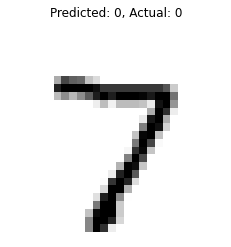

------------------------------------------------------------


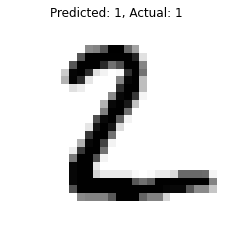

------------------------------------------------------------


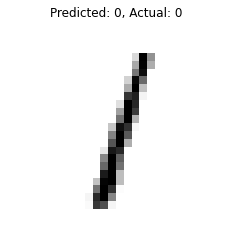

------------------------------------------------------------


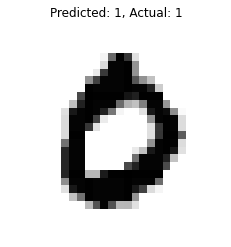

------------------------------------------------------------


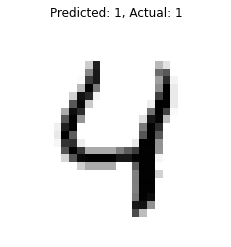

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

#### Observation
From this we can see how transfer learning may be used to perform various task without again making the model for it and just by changing the layers of our interest. Models like VGG-16 are widely used in Image classification kind of tasks.